Pranjal Seluriyal Aiml

In [2]:
#https://github.com/Pranjal-Seluriyal/AIML


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print("Top 5 rows of dataset:")
print(df.head())

print("\n Dataset Info ")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("Target Distribution:")
print(df['Outcome'].value_counts())

Top 5 rows of dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int

In [5]:
#the file does not have any NaN values but has some values zero that need to be filled
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Fill missing values with median of each column
df.fillna(df.median(numeric_only=True), inplace=True)

# Check again to confirm missing values handled
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


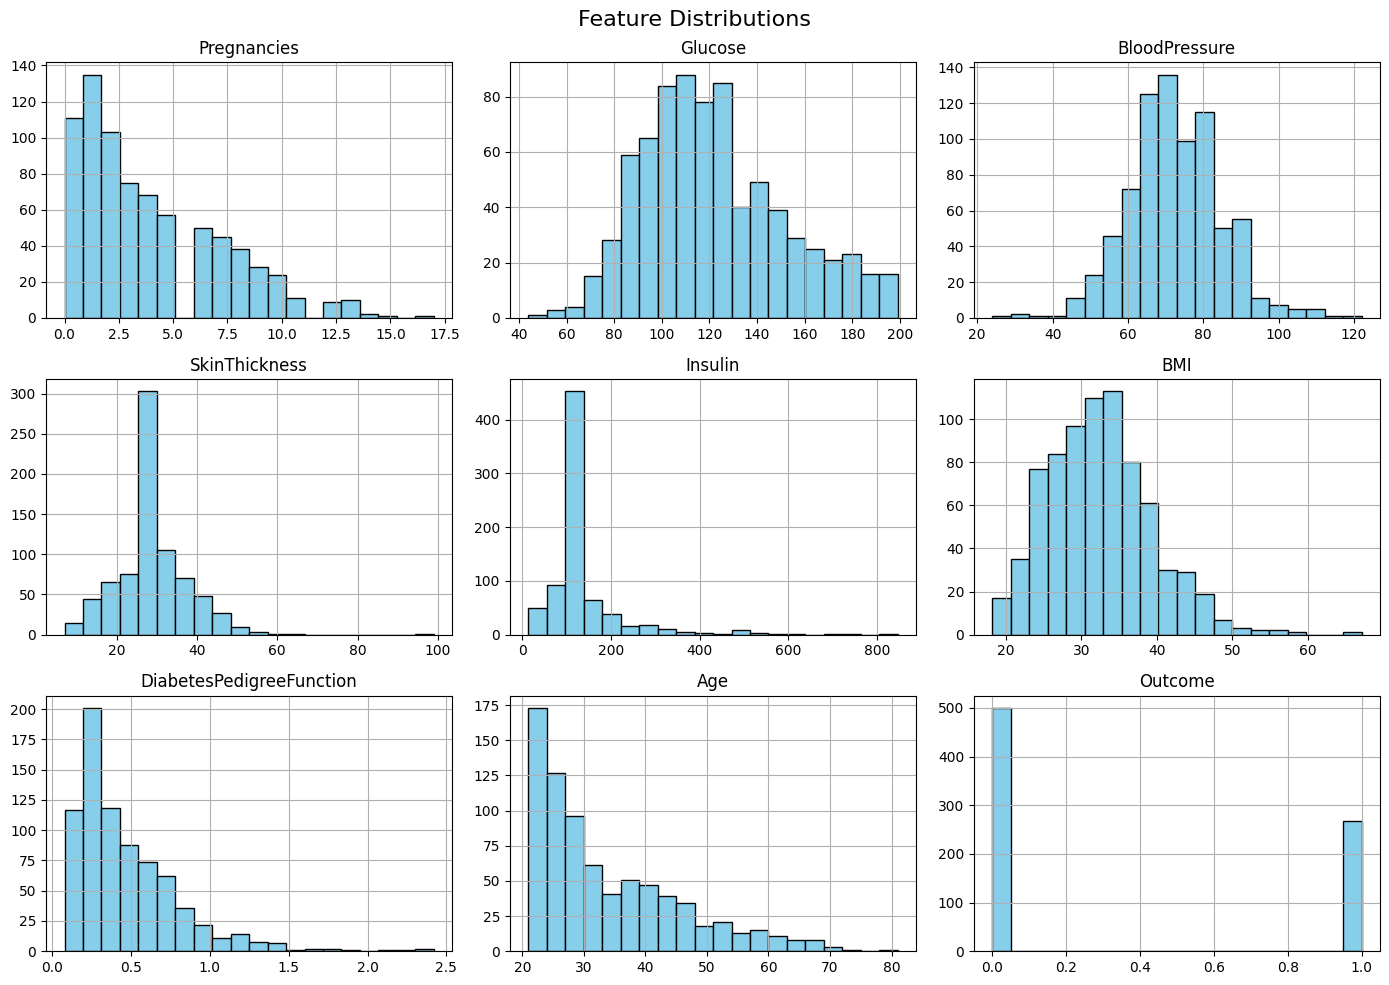

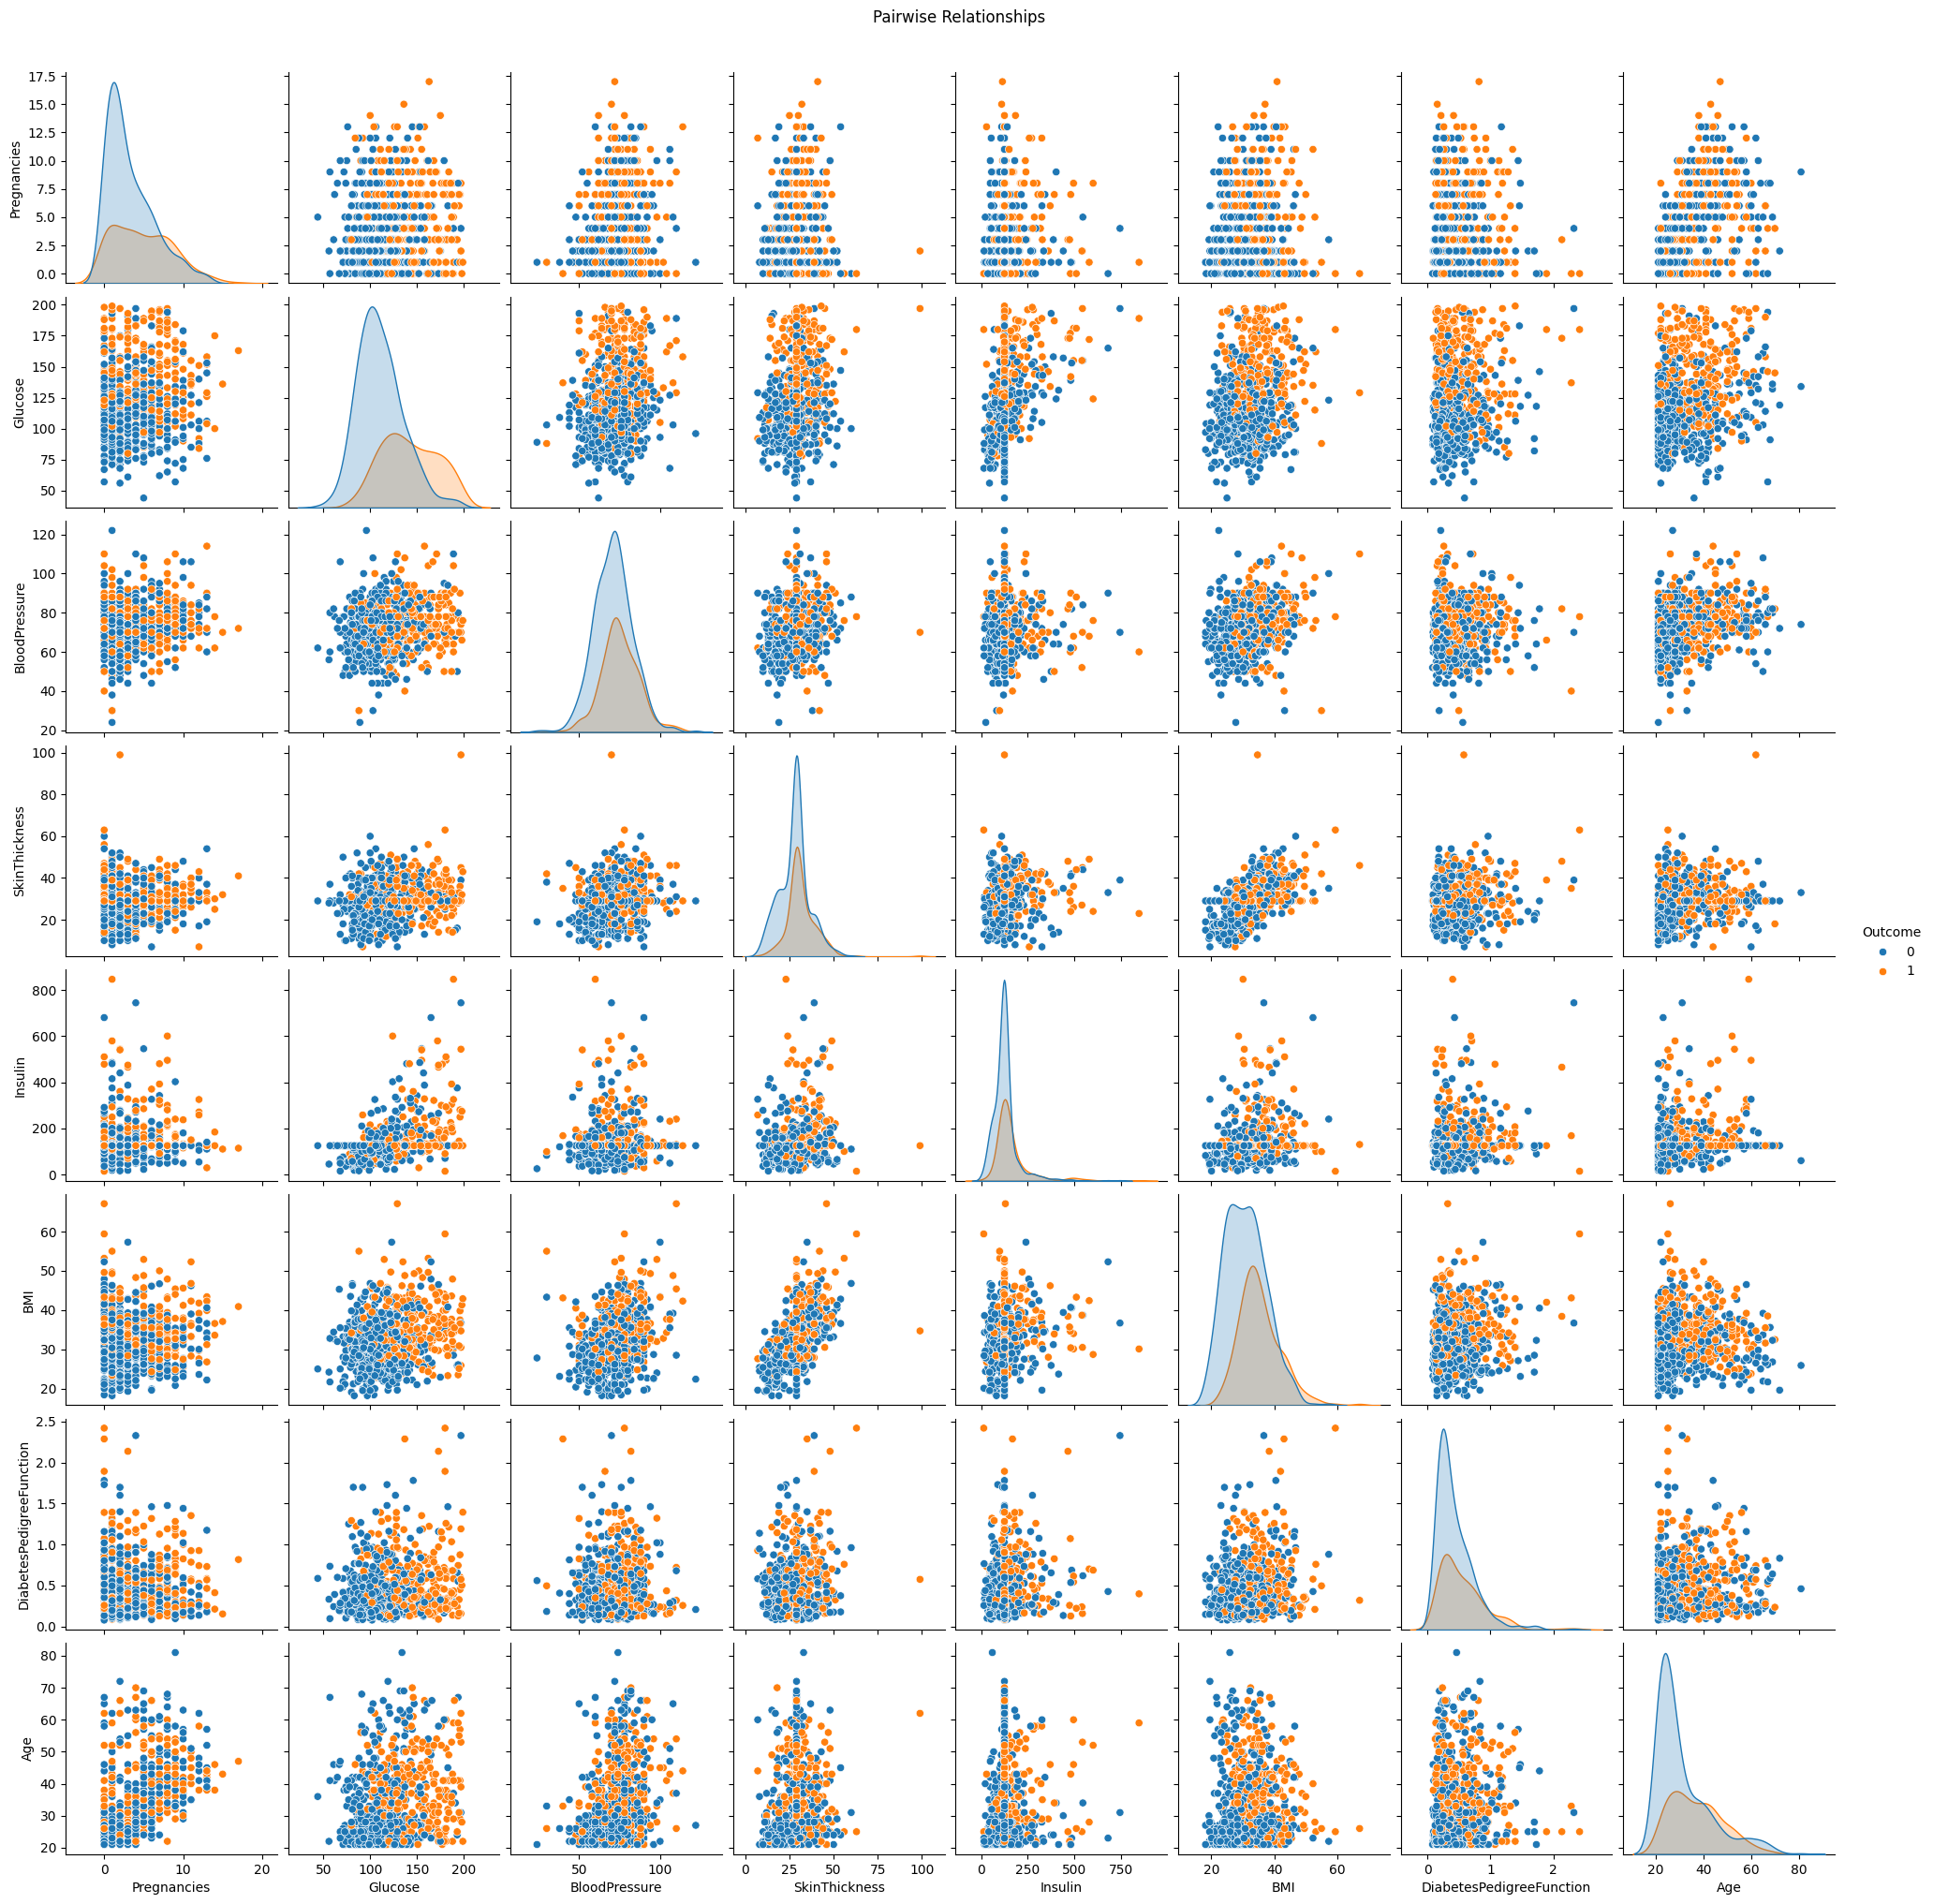

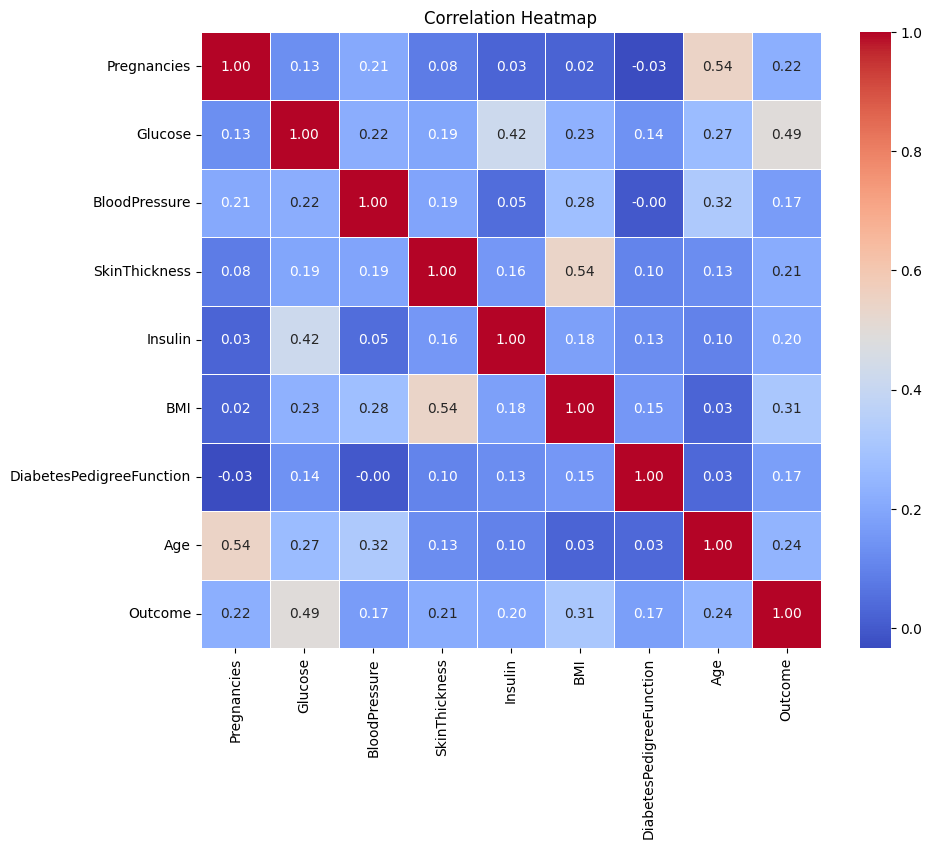

C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\58949013.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set2")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\58949013.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set2")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\58949013.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set2")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11768\58949013.py:24: FutureWarn

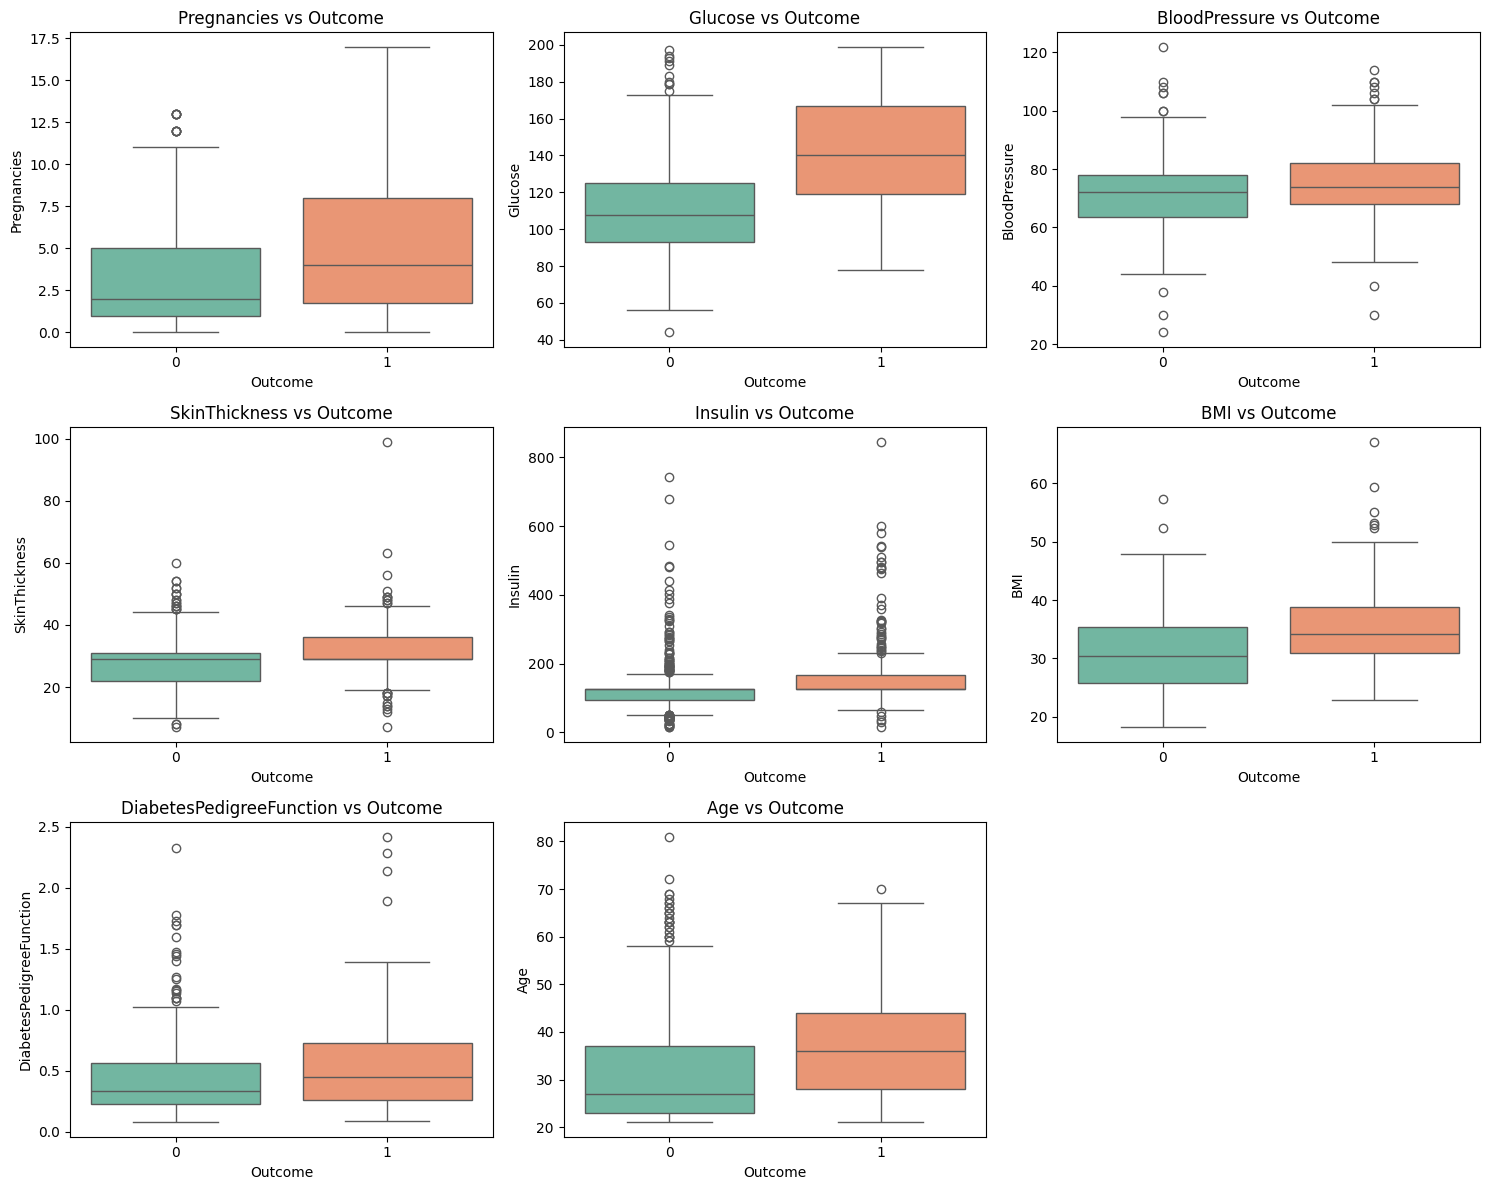

In [7]:
# Distribution of each feature
df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Pairplot to see relationships and class separation
sns.pairplot(df, hue="Outcome", diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to compare each feature by Outcome
features = df.columns[:-1]  

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Outcome", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()


In [8]:
# Feature selection

X = df.drop("Outcome", axis=1)

y = df["Outcome"]

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (768, 8)
Shape of y (target): (768,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree depth:", dt_model.get_depth())
print("Number of leaves:", dt_model.get_n_leaves())


Decision Tree depth: 18
Number of leaves: 111


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test data: 0.7207792207792207
Confusion Matrix:
[[76 23]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



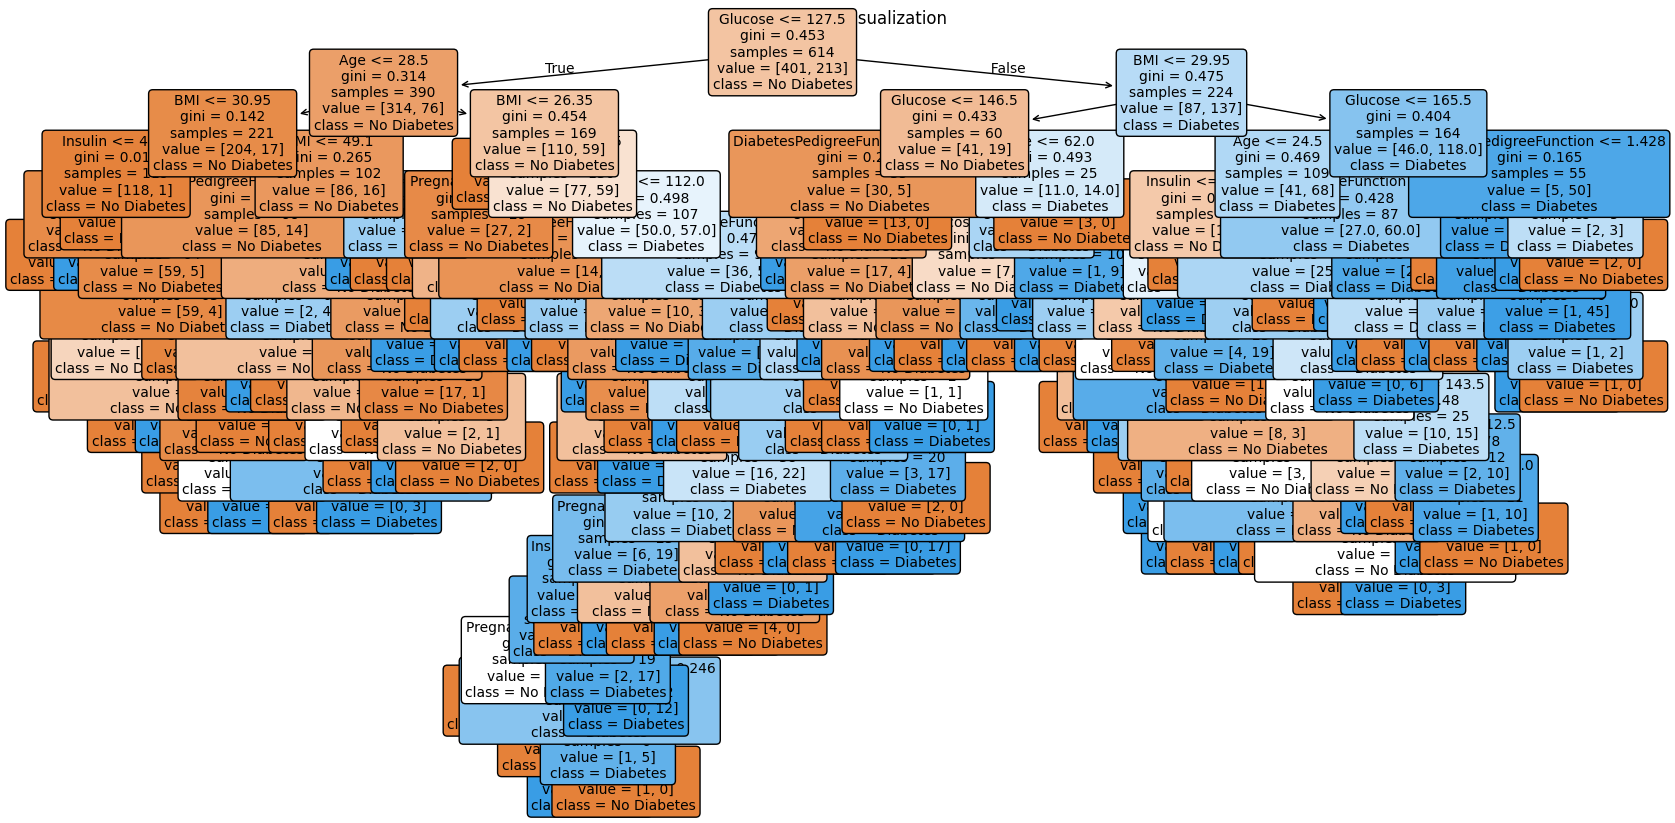

In [13]:
#descision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [14]:
# Create a Decision Tree model using 'entropy' criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_entropy.fit(X_train, y_train)

# Evaluate basic characteristics
print("Entropy-based Decision Tree depth:", dt_entropy.get_depth())
print("Number of leaves:", dt_entropy.get_n_leaves())

Entropy-based Decision Tree depth: 17
Number of leaves: 106


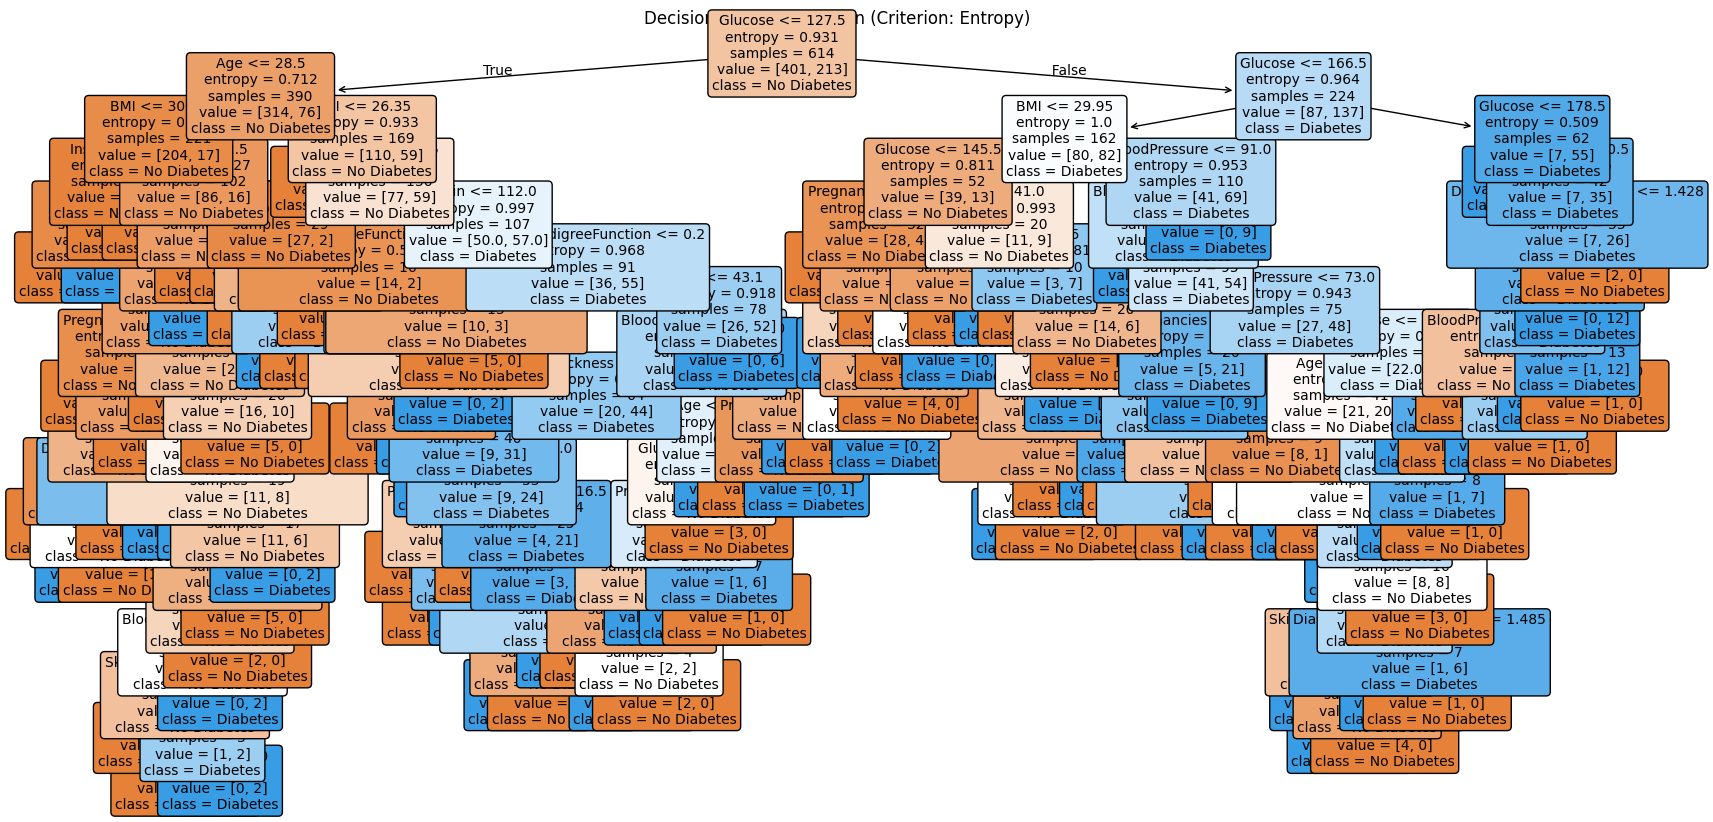

In [16]:
#visualize the Decision Tree again using the 'entropy' criterion

plt.figure(figsize=(20, 10))
plot_tree(
    dt_entropy,
    filled=True,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Criterion: Entropy)")
plt.show()

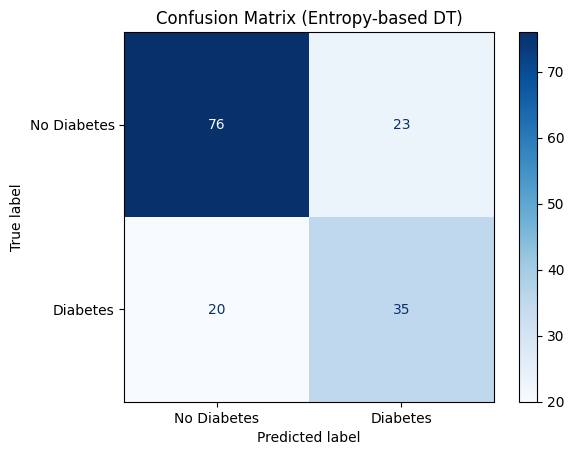

Precision: 0.603448275862069
Recall: 0.6363636363636364
F1 Score: 0.6194690265486725


In [17]:
#Find the model performance

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Predict using entropy-based decision tree
y_pred_entropy = dt_entropy.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_entropy, display_labels=["No Diabetes", "Diabetes"], cmap="Blues")
plt.title("Confusion Matrix (Entropy-based DT)")
plt.show()

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_entropy)
recall = recall_score(y_test, y_pred_entropy)
f1 = f1_score(y_test, y_pred_entropy)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)